# Abstract

In this notebook, we conducted a comprehensive analysis of smartphone sales data to uncover insights into market trends and pricing dynamics. Initially, we imported and explored the dataset, which comprises 3,114 rows and 12 columns, detailing various attributes such as brand, model, memory, storage, camera, rating, selling price, and discount information. We addressed data quality issues by filling missing values, correcting inconsistent entries, and handling duplicates. A thorough investigation of invalid values and outliers was performed to ensure the integrity of the dataset. Subsequently, we conducted correlation analysis to identify relationships between variables.
We performed exploratory data visualization to gain a deeper understanding of smartphone sales trends. We employed various visualization techniques to examine relationships and distributions within the dataset.
These visualizations offer a clear view of market trends and consumer preferences, contributing to a better understanding of pricing strategies and product popularity.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extracting and discovering Our Data

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Smartphones_Sales_Analysis/Sales.csv',header=0)

In [ ]:
sales =pd.DataFrame(csv_file)

In [ ]:
sales.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [ ]:
sales.tail()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.00075
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.00000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.00000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.00000
3113,GIONEE,F9,Blue,3 GB,32 GB,Yes,4.2,7900,7900,GIONEE F9,0,0.00000


In [ ]:
print(str(sales.shape[0]) + " rows, " + str(sales.shape[1]) + " columns")

3114 rows, 12 columns


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [ ]:
sales.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


# Cleaning Our Data

In [ ]:
sales.rename(columns={'discount percentage': 'Discount Percentage'}, inplace=True)

### Missing Values

In [ ]:
sales.isnull().sum()

,0
Brands,0
Models,0
Colors,0
Memory,43
Storage,39
Camera,0
Rating,144
Selling Price,0
Original Price,0
Mobile,0


In [ ]:
sales['Rating'].fillna(sales['Rating'].mean(), inplace=True)
sales['Memory'].fillna('Unknown', inplace=True)
sales['Storage'].fillna('Unknown', inplace=True)

In [ ]:
sales.isnull().sum()

,0
Brands,0
Models,0
Colors,0
Memory,0
Storage,0
Camera,0
Rating,0
Selling Price,0
Original Price,0
Mobile,0


### Invalidate Values

In [ ]:
print("Brands",sales['Brands'].unique())
print("Camera",sales['Camera'].unique())
print("Memory",sales['Memory'].unique())
print("Storage",sales['Storage'].unique())
print("Rating",sales['Rating'].unique())

Brands ['SAMSUNG' 'Nokia' 'realme' 'Infinix' 'Apple' 'GIONEE' 'Xiaomi' 'OPPO'
 'vivo' 'Lenovo' 'ASUS' 'Motorola' 'HTC' 'Google Pixel' 'LG' 'POCO' 'IQOO']
Camera ['Yes']
Memory ['8 GB' '2 GB' '4 GB' '4GB' '8 MB' '6 GB' '3 GB' '1.5 GB' 'Unknown' '1 GB'
 '2 MB' '512 MB' '12 GB' '768 MB' '10 MB' '32 MB' '4 MB' '16 MB' '64 MB'
 '128 MB' '153 MB' '30 MB' '46 MB' '18 GB' '32 GB' '100 MB' '16 GB']
Storage ['128 GB' '16 GB' 'Unknown' '64 GB' '16 MB' '512 GB' '256 GB' '32 GB'
 '8 GB' '2 MB' '4 GB' 'Expandable Upto 16 GB' '1 TB' '64 MB'
 'Expandable Upto 32 GB' '4 MB' '8 MB' '128 MB' '512 MB' '129 GB' '256 MB'
 '153 MB' '130 GB' '10 MB' '48 MB' '100 MB' '140 MB']
Rating [4.3        3.8        4.4        4.2        4.6        4.
 4.24309764 4.1        3.9        3.5        4.5        3.7
 4.7        3.3        5.         3.6        4.9        3.4
 2.8        2.7        3.         2.4        3.2        2.3
 4.8        3.1       ]


In [ ]:
sales['Memory'] = sales['Memory'].replace({'4GB' : '4 GB'})

In [ ]:
print("Memory",sales['Memory'].unique())

Memory ['8 GB' '2 GB' '4 GB' '8 MB' '6 GB' '3 GB' '1.5 GB' 'Unknown' '1 GB'
 '2 MB' '512 MB' '12 GB' '768 MB' '10 MB' '32 MB' '4 MB' '16 MB' '64 MB'
 '128 MB' '153 MB' '30 MB' '46 MB' '18 GB' '32 GB' '100 MB' '16 GB']


In [ ]:
sales['Rating'] = sales['Rating'].round(1)

In [ ]:
print("Rating",sales['Rating'].unique())

Rating [4.3 3.8 4.4 4.2 4.6 4.  4.1 3.9 3.5 4.5 3.7 4.7 3.3 5.  3.6 4.9 3.4 2.8
 2.7 3.  2.4 3.2 2.3 4.8 3.1]


In [ ]:
#Checking if there's negative values of discounts
sales.loc[(sales['Discount'] < 0) | (sales['Discount Percentage'] < 0)]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage
2137,OPPO,A5s,Red,2 GB,32 GB,Yes,4.3,12990,4990,OPPO A5s,-8000,-160.320641


### Duplicated Data

In [ ]:
sales.duplicated().sum()

108

In [ ]:
sales.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3109,False
3110,True
3111,True
3112,False


In [ ]:
sales.loc[(sales['Brands'] == 'Nokia') & (sales['Models'] == '225') & (sales['Colors'] == 'Black') & (sales['Memory'] == 'Unknown')
 & (sales['Storage'] == 'Expandable Upto 32 GB')  & (sales['Camera'] == 'Yes') & (sales['Rating'] == 3.600000)
 & (sales['Selling Price'] == 3499)  & (sales['Original Price'] == 3499) & (sales['Mobile'] == 'Nokia 225')
 & (sales['Discount'] == 0) & (sales['Discount Percentage'] == 0.00000) ]


,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage
376,Nokia,225,Black,Unknown,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.0
3110,Nokia,225,Black,Unknown,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.0


In [ ]:
sales= sales.drop_duplicates(keep='first')

In [ ]:
sales.duplicated().sum()

0

In [ ]:
sales.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3107,False
3108,False
3109,False
3112,False


### Outliers

In [ ]:
sales.loc[sales['Discount Percentage'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage
2137,OPPO,A5s,Red,2 GB,32 GB,Yes,4.3,12990,4990,OPPO A5s,-8000,-160.320641


In [ ]:
sales.loc[sales['Discount'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage
2137,OPPO,A5s,Red,2 GB,32 GB,Yes,4.3,12990,4990,OPPO A5s,-8000,-160.320641


In [ ]:
sales.loc[sales['Selling Price'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage


In [ ]:
sales.loc[sales['Original Price'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage


In [ ]:
sales.loc[sales['Rating'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage


In [ ]:
sales.drop(sales.loc[sales['Discount Percentage'] < 0].index, inplace=True)

In [ ]:
sales.loc[sales['Discount Percentage'] < 0]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage


# Analyzing Our Data

### Correlation Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded_sales = sales.copy()
categorical_columns =['Brands','Colors','Memory','Storage','Models','Camera','Mobile']
for column in categorical_columns:
    encoded_sales[column] = le.fit_transform(encoded_sales[column])


correl= encoded_sales.select_dtypes(include='number').corr()

In [ ]:
correl

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,Discount Percentage
Brands,1.000000,-0.410656,-0.092310,0.234553,-0.065813,NaN,0.071420,-0.387417,-0.368868,0.970203,0.002397,0.112421
Models,-0.410656,1.000000,0.157801,-0.037198,-0.013680,NaN,0.172071,0.393798,0.382123,-0.281861,0.039534,-0.113927
Colors,-0.092310,0.157801,1.000000,-0.016517,-0.027994,NaN,0.071999,0.138875,0.139117,-0.068319,0.039425,0.029658
Memory,0.234553,-0.037198,-0.016517,1.000000,-0.314105,NaN,0.299991,0.161659,0.176462,0.239533,0.130780,0.153339
Storage,-0.065813,-0.013680,-0.027994,-0.314105,1.000000,NaN,-0.126271,-0.137283,-0.148971,-0.073615,-0.105900,-0.083214
Camera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,0.071420,0.172071,0.071999,0.299991,-0.126271,NaN,1.000000,0.380014,0.380356,0.125548,0.106005,0.057632
Selling Price,-0.387417,0.393798,0.138875,0.161659,-0.137283,NaN,0.380014,1.000000,0.985799,-0.313798,0.190687,-0.069342
Original Price,-0.368868,0.382123,0.139117,0.176462,-0.148971,NaN,0.380356,0.985799,1.000000,-0.298515,0.352827,0.049876
Mobile,0.970203,-0.281861,-0.068319,0.239533,-0.073615,NaN,0.125548,-0.313798,-0.298515,1.000000,0.003454,0.084227


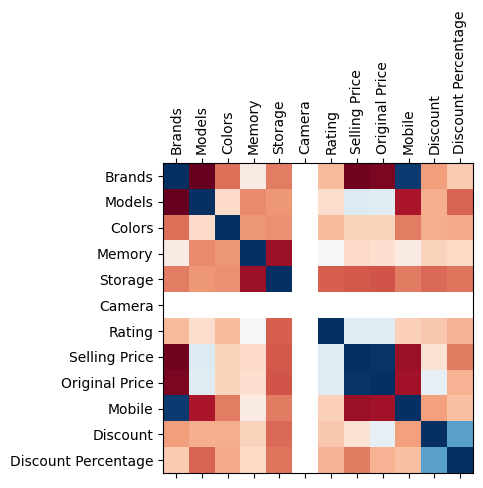

In [ ]:
fig=plt.figure(figsize=(4, 4))
plt.matshow(correl,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(correl.columns)), correl.columns,rotation='vertical')
plt.yticks(range(len(correl.columns)), correl.columns)
plt.show()

There is a strong correlation between 'Mobile' and 'Brands'. Additionally, 'Selling Price' and 'Original Price' are highly correlated, showing that changes in one are mirrored by changes in the other. Other correlations, such as between 'Memory' and 'Selling Price', show weaker yet present relationships.

### Exploratory Data Visualization

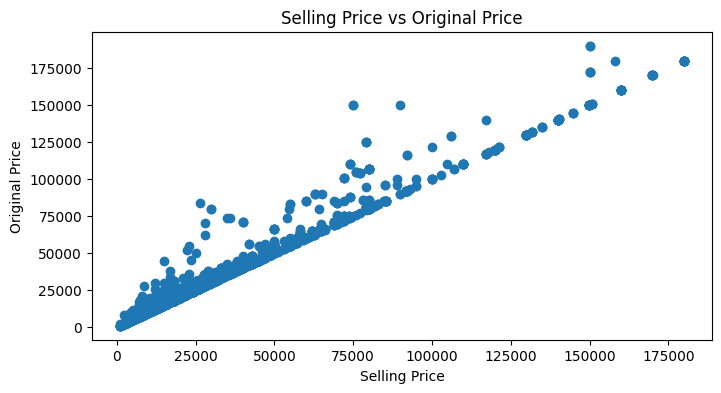

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(sales['Selling Price'], sales['Original Price'])
plt.title('Selling Price vs Original Price')
plt.xlabel('Selling Price')
plt.ylabel('Original Price')
plt.show()

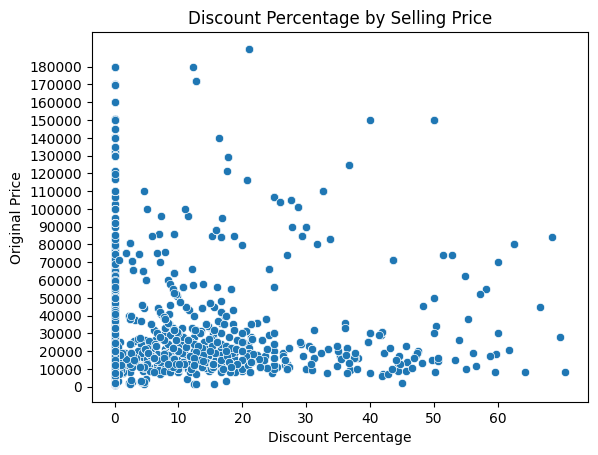

In [ ]:
sns.scatterplot(data=sales, x='Discount Percentage', y='Original Price')
plt.xticks(range(0, int(sales['Discount Percentage'].max()), 10))
plt.yticks(range(0, int(sales['Original Price'].max()), 10000))
plt.title('Discount Percentage by Selling Price')
plt.show()

*So we can conclude from the visualization above that the majority of discounts fall within the range of 0 and 25% for original prices between roughly 0 and 40000.*

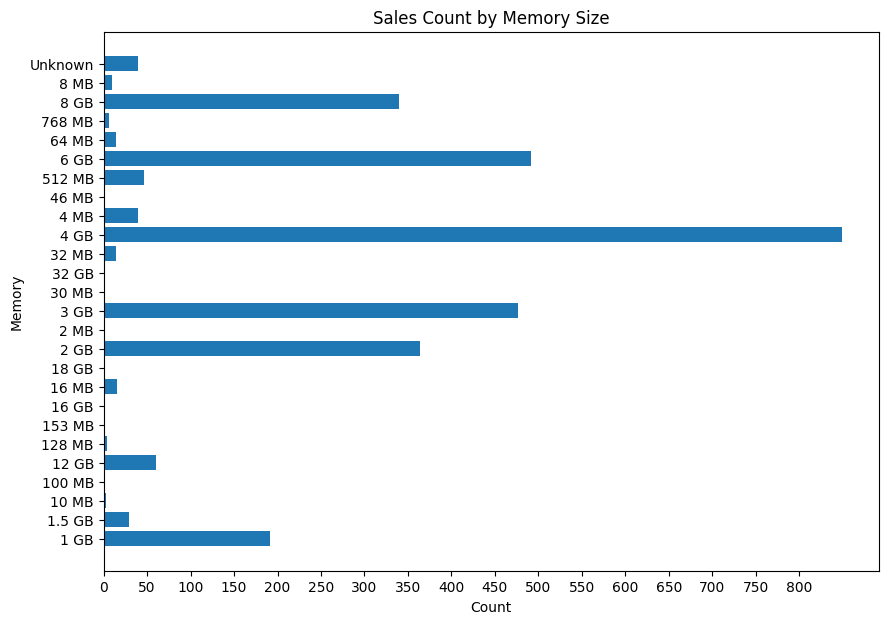

In [ ]:
sales_by_memory = sales.groupby('Memory').size().reset_index(name='Count')

plt.figure(figsize=(10, 7))
plt.barh(sales_by_memory['Memory'],sales_by_memory['Count'])
plt.ylabel('Memory')
plt.xlabel('Count')
plt.xticks(range(0, sales_by_memory['Count'].max(), 50))
plt.title('Sales Count by Memory Size')
plt.show()

*Based on the visualization above, it is clear that smartphones with 4 GB of memory are the most popular in terms of sales.*

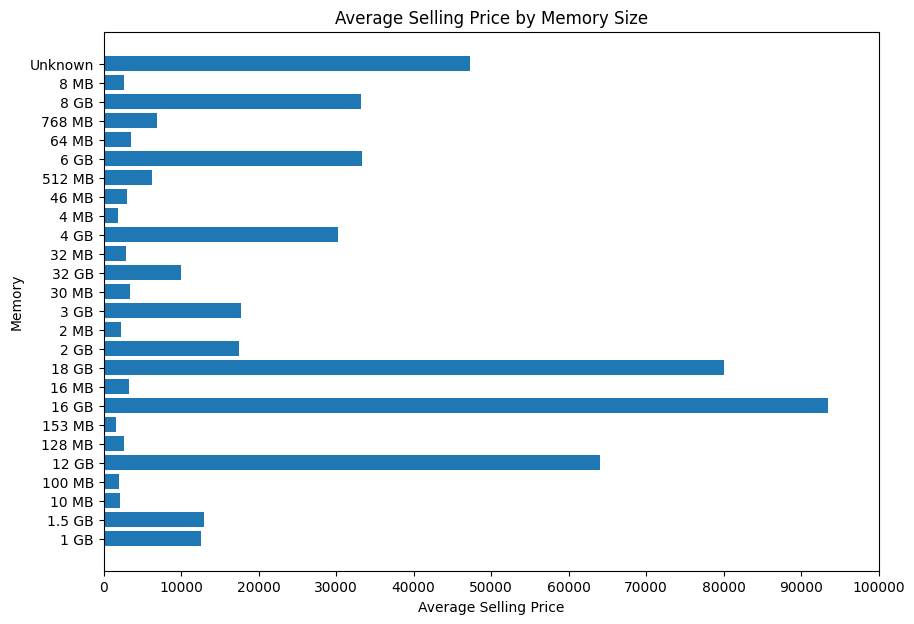

In [ ]:
average_price_by_memory = sales.groupby('Memory')['Selling Price'].mean().reset_index()

plt.figure(figsize=(10, 7))
plt.barh(average_price_by_memory['Memory'],average_price_by_memory['Selling Price'])
plt.ylabel('Memory')
plt.xlabel('Average Selling Price')
plt.xticks(range(0, int(average_price_by_memory['Selling Price'].max()+10000), 10000))
plt.title('Average Selling Price by Memory Size')
plt.show()

*The bar chart titled 'Average Selling Price by Memory Size' shows that smartphones with 16 GB of memory have the highest average selling price.*

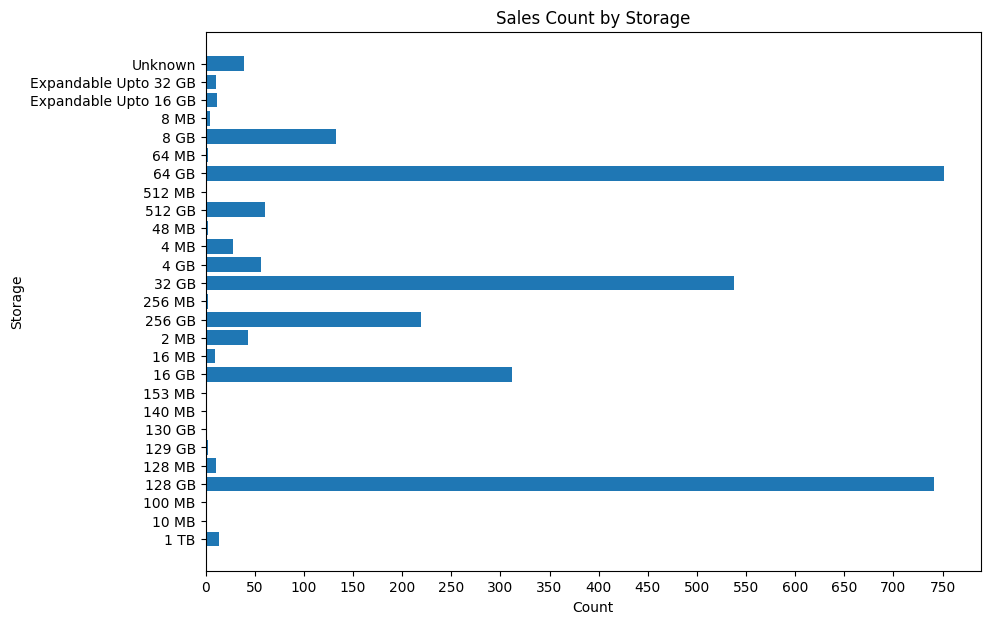

In [ ]:
sales_by_storage = sales.groupby('Storage').size().reset_index(name='Count')

plt.figure(figsize=(10, 7))
plt.barh(sales_by_storage['Storage'],sales_by_storage['Count'])
plt.ylabel('Storage')
plt.xlabel('Count')
plt.xticks(range(0, sales_by_storage['Count'].max(), 50))
plt.title('Sales Count by Storage')
plt.show()

*This visualization titled 'Sales Count by Storage', smartphones with 64 GB and 128 GB of storage are the most popular in terms of sales.*

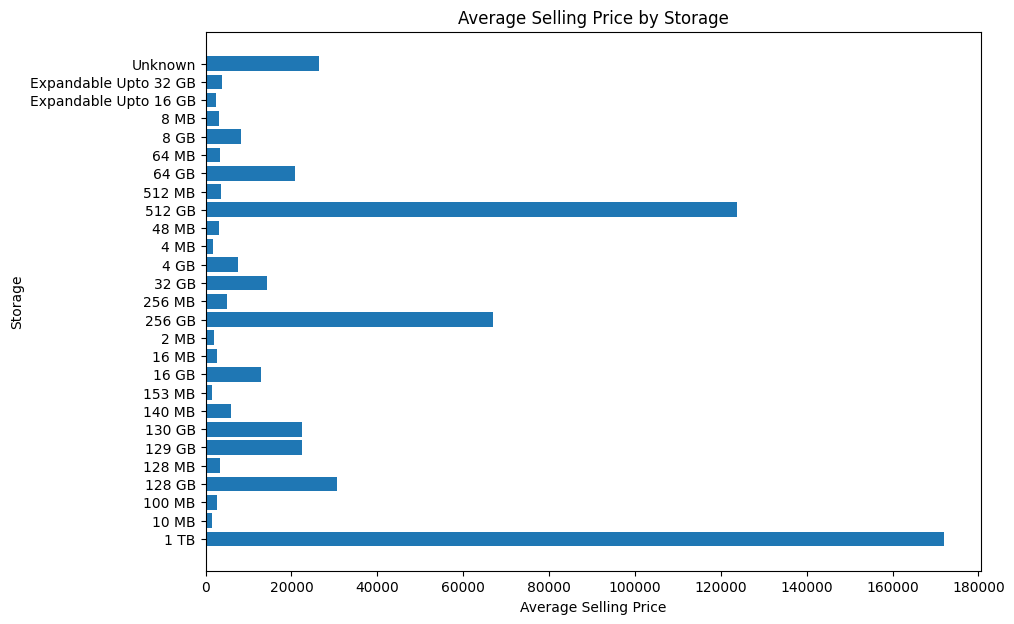

In [ ]:
average_price_by_storage = sales.groupby('Storage')['Selling Price'].mean().reset_index()

plt.figure(figsize=(10, 7))
plt.barh(average_price_by_storage['Storage'],average_price_by_storage['Selling Price'])
plt.ylabel('Storage')
plt.xlabel('Average Selling Price')
plt.xticks(range(0, int(average_price_by_storage['Selling Price'].max()+10000), 20000))
plt.title('Average Selling Price by Storage')
plt.show()

*The bar chart titled 'Average Selling Price by Storage' illustrates that smartphones with 1 TB of storage command the highest average selling price, followed by those with 512 GB.*

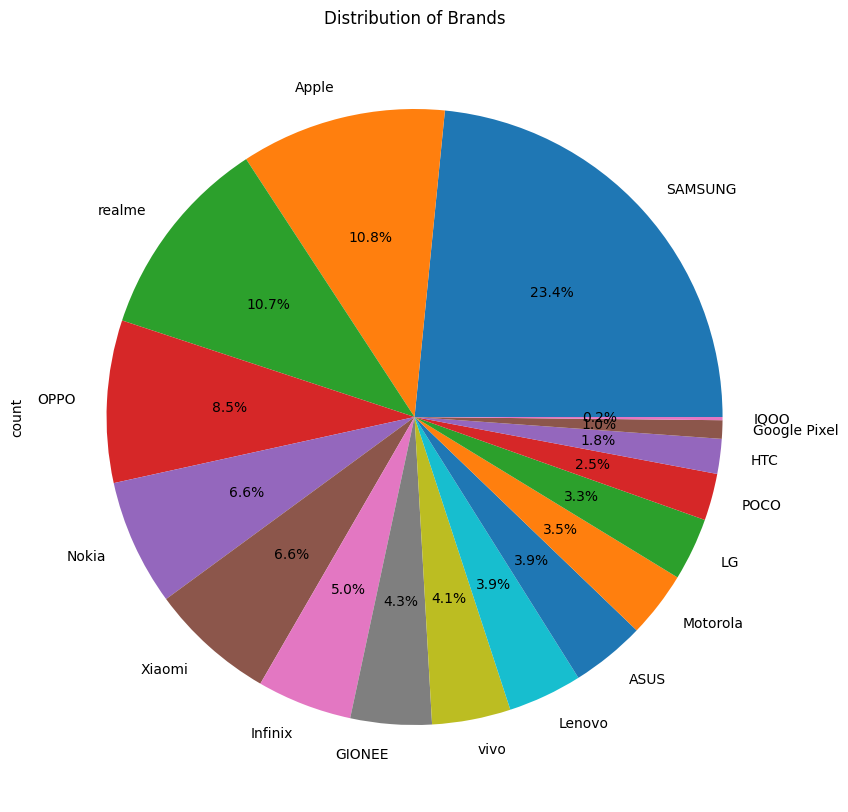

In [ ]:
sales['Brands'].value_counts().plot(kind='pie',figsize=(10, 10),autopct='%1.1f%%')
plt.title('Distribution of Brands')
plt.show()

*We can see that Samsung Brand accounts for the majority of sales.*

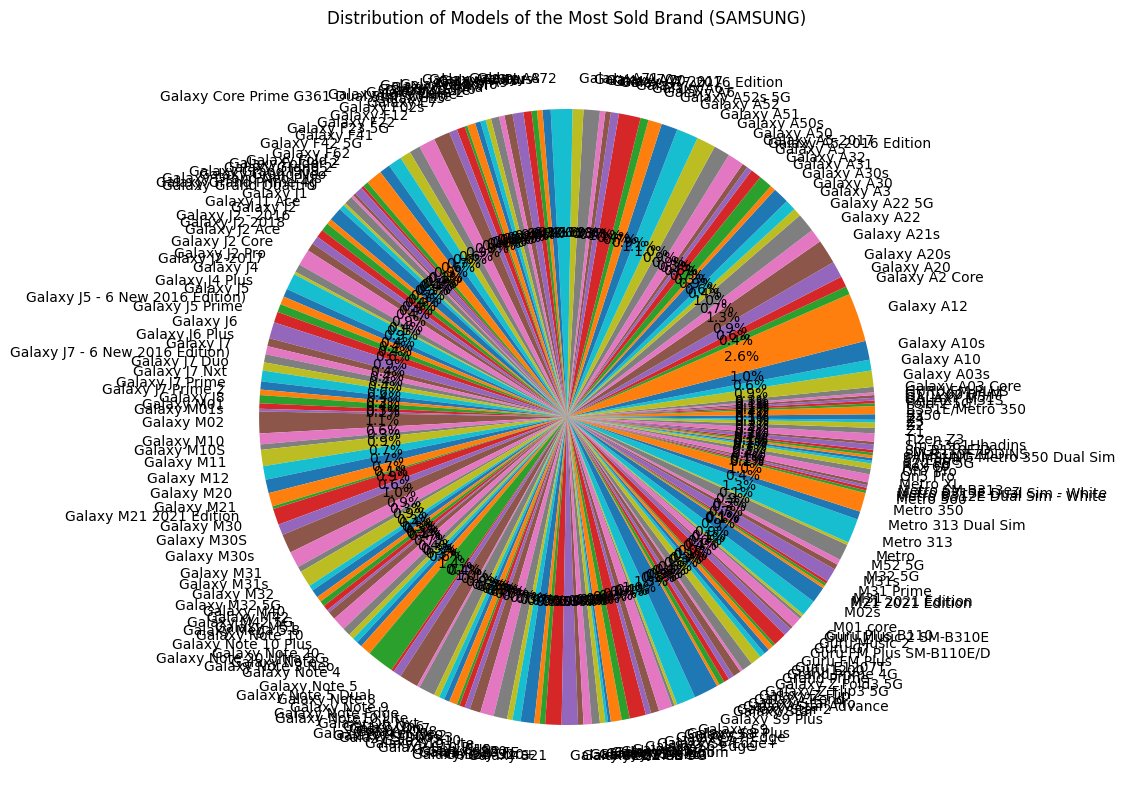

In [ ]:
model_counts = sales.loc[sales['Brands'] == 'SAMSUNG'].groupby('Models').size()

plt.figure(figsize=(10, 10))
model_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Models of the Most Sold Brand (SAMSUNG)')
plt.show()

*The Galaxy A12 model dominates Samsung’s sales, representing the largest share among its models.*

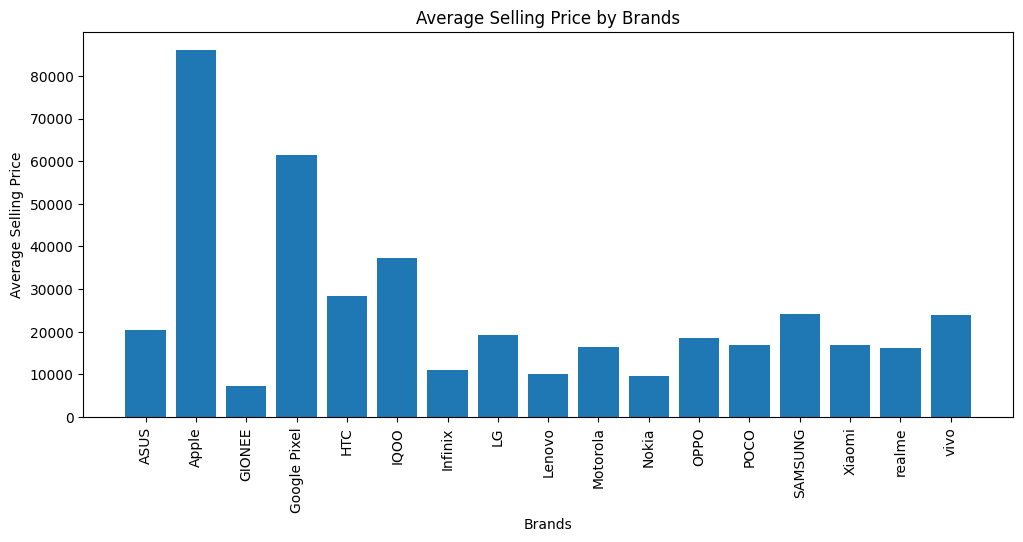

In [ ]:
brands_profit = sales.groupby('Brands')['Selling Price'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.bar(brands_profit['Brands'],brands_profit['Selling Price'])
plt.xlabel('Brands')
plt.ylabel('Average Selling Price')
plt.yticks(range(0, int(brands_profit['Selling Price'].max()), 10000))
plt.xticks(rotation=90)
plt.title('Average Selling Price by Brands')
plt.show()

*This chart shows that although Samsung is the most sold brand, Apple has the highest average selling price, indicating that Apple products are more expensive.*

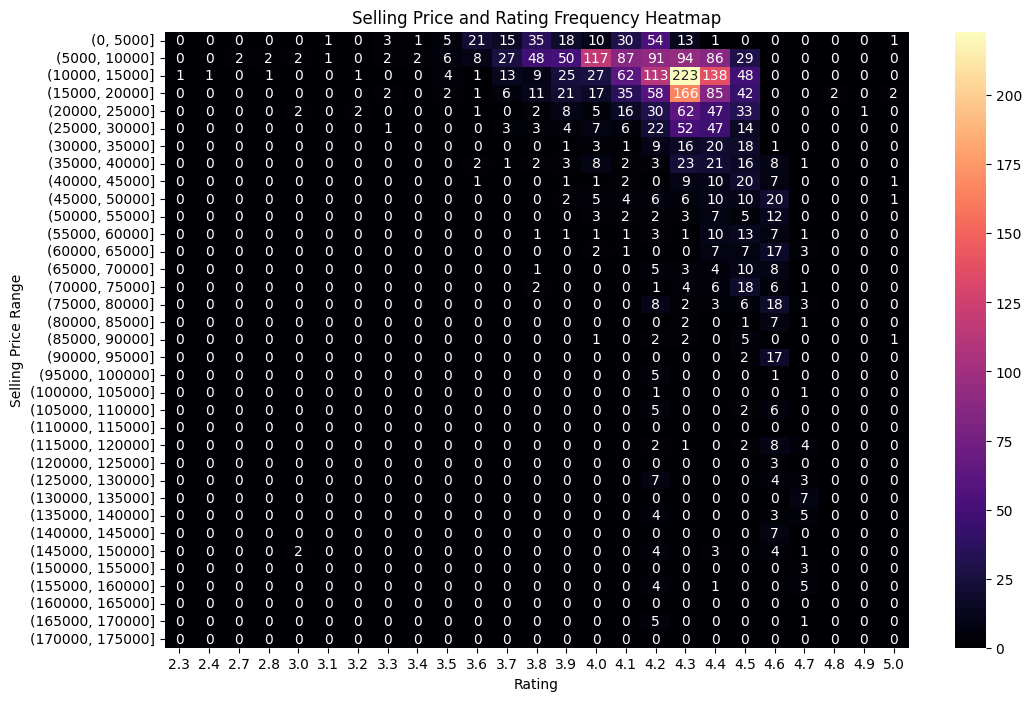

In [ ]:
Price_range = pd.DataFrame()
Price_range['Price_range'] = pd.cut(sales['Selling Price'], bins=np.arange(0, sales['Selling Price'].max(), 5000))

pivot_table = sales.pivot_table(index=Price_range['Price_range'], columns='Rating', aggfunc='size')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='magma')
plt.title('Selling Price and Rating Frequency Heatmap')
plt.xlabel('Rating')
plt.ylabel('Selling Price Range')
plt.show()

*Notably, the rating of 4.3 appears with the highest frequency in the price range of [10,000, 15,000].*

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.violinplot(data=sales, x='Rating', y='Selling Price', palette='Set2')
# plt.title('Distribution of Selling Price by Rating')
# plt.xlabel('Rating')
# plt.ylabel('Selling Price')
# plt.show()